In [96]:
!pip install easyocr
!pip install imutils

In [97]:
import cv2
from matplotlib import pyplot as plt
import easyocr
import numpy as np
import easyocr
import imutils

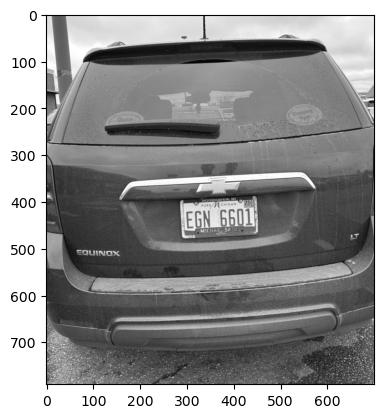

In [126]:
img = cv2.imread("../assets/image7.jpeg")
img = imutils.resize(img, width=700)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

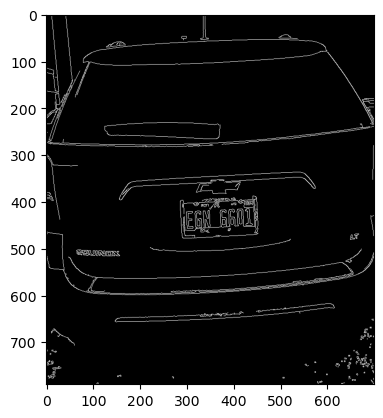

In [128]:
bfilter = cv2.bilateralFilter(gray, 20, 30, 60)  # Smooth image and preserve edges
edged = cv2.Canny(bfilter, 80, 400)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [130]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [132]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [134]:
location

array([[[299, 422]],

       [[301, 457]],

       [[313, 457]],

       [[312, 421]]], dtype=int32)

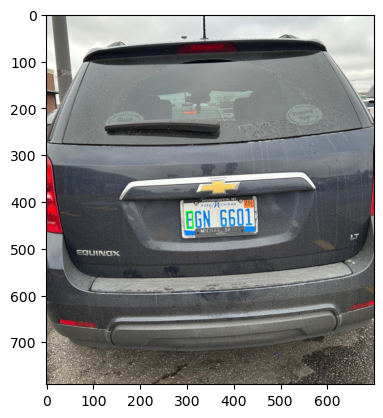

In [136]:
new_img = cv2.drawContours(img, [location], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

In [138]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

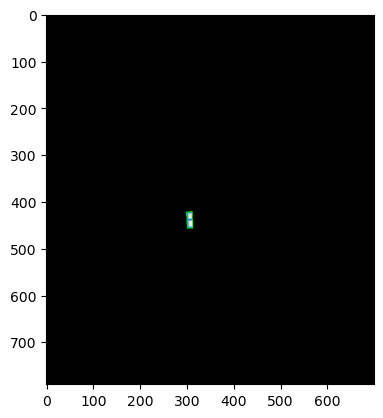

In [140]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

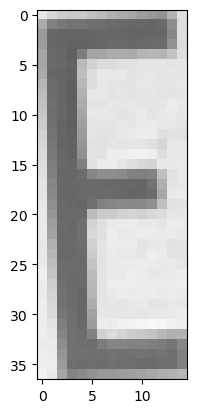

In [142]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

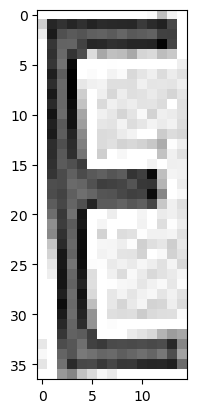

In [144]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened_image = cv2.filter2D(cropped_image, -1, kernel)

plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))

In [149]:
reader = easyocr.Reader(['en'])
result = reader.readtext(sharpened_image)
result

[]

In [147]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0]+20, approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

IndexError: list index out of range